### Install & import required libraries




In [1]:
!pip install scikit-plot

/home/rama/anaconda3/lib/python3.8/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/home/rama/anaconda3/lib/python3.8/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm 
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report,auc
from scikitplot.metrics import plot_confusion_matrix, plot_roc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import MinMaxScaler

import scikitplot as skplt
from scikitplot.metrics import plot_confusion_matrix, plot_roc

import warnings
warnings.filterwarnings('ignore')

### Read the dataset

In [3]:
df = pd.read_csv('BankChurners.csv')

## Understanding the Data

In [4]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns')

print('\nData columns are :')
print(df.columns)

There are 10127 rows and 21 columns

Data columns are :
Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


Let's have a look at the dataset:

In [5]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Datset details:

**CLIENTNUM**: Client number. Unique identifier for the customer holding the account       
**Attrition_Flag**: Internal event (customer activity) variable - if the account is closed then 1 else 0          
**Customer_Age**: Age in Years          
**Gender**: Gender of the account holder          
**Dependent_count**: Number of dependents                
**Education_Level**: Educational Qualification of the account holder                
**Marital_Status**: Marital Status of the account holder                 
**Income_Category**: Annual Income Category of the account holder                   
**Card_Category**: Type of Card                            
**Months_on_book**: Period of relationship with the bank                
**Total_Relationship_Count**: Total no. of products held by the customer                 
**Months_Inactive_12_mon**: No. of months inactive in the last 12 months                    
**Contacts_Count_12_mon**: No. of Contacts in the last 12 months                     
**Credit_Limit**: Credit Limit on the Credit Card                                
**Total_Revolving_Bal**: The balance that carries over from one month to the next is the revolving balance        
**Avg_Open_To_Buy**: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)   
**Total_Trans_Amt**: Total Transaction Amount (Last 12 months)                        
**Total_Trans_Ct**: Total Transaction Count (Last 12 months)                                   
**Total_Ct_Chng_Q4_Q1**: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter                                        
**Total_Amt_Chng_Q4_Q1**: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter                                                    
**Avg_Utilization_Ratio**: Represents how much of the available credit the customer spent                 

In [6]:
df.shape

(10127, 21)

### **Exploratory Data Analysis  (EDA)**

In [7]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


### Univariate Analysis

Let's us look at the Gender variable:

<AxesSubplot:xlabel='Gender', ylabel='count'>

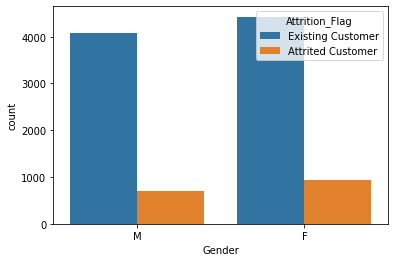

In [8]:
# Count plot for Gender
sns.countplot(x='Gender', data=df, hue = 'Attrition_Flag')

It seems Attrition rate is high for Females than for Males with minimal difference.

Let's look at the Dependent_count:

<AxesSubplot:xlabel='Dependent_count', ylabel='count'>

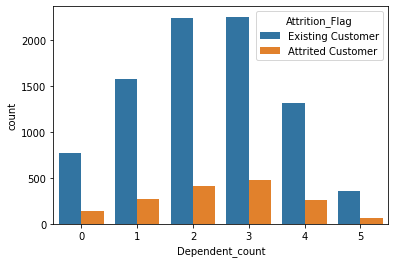

In [9]:
# Count plot for Dependent_count
sns.countplot(x='Dependent_count', data=df, hue = 'Attrition_Flag')

It appears that attrition rate is high for number of dependents 3 & 2.

Let's look at the Education_Level:

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

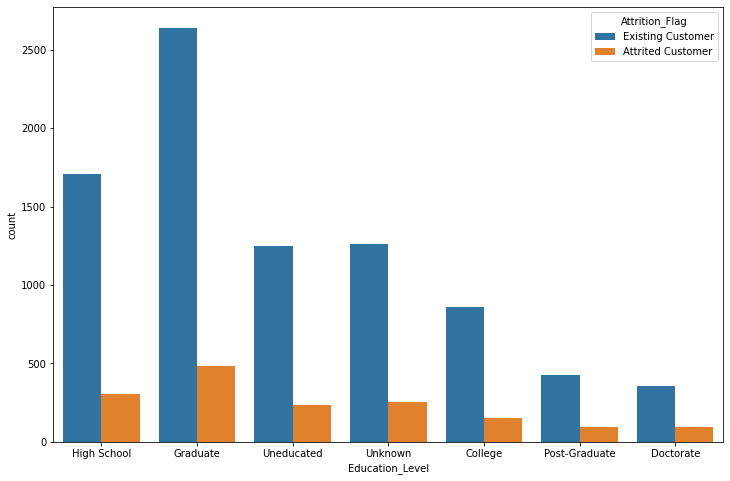

In [10]:
# Count plot for Education_Level
plt.figure(figsize = (12,8))
sns.countplot(x='Education_Level', data=df, hue = 'Attrition_Flag')

Graduates are more likely to churn than any education level category.

Let's look at the Marital_Status variable:

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

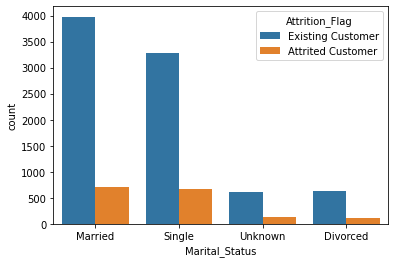

In [11]:
# Count plot for Marital_Status
sns.countplot(x='Marital_Status', data=df, hue = 'Attrition_Flag')

Both Married & Single staus customers have high churn rate.

Let's look at the Income_Category feature:

<AxesSubplot:xlabel='Income_Category', ylabel='count'>

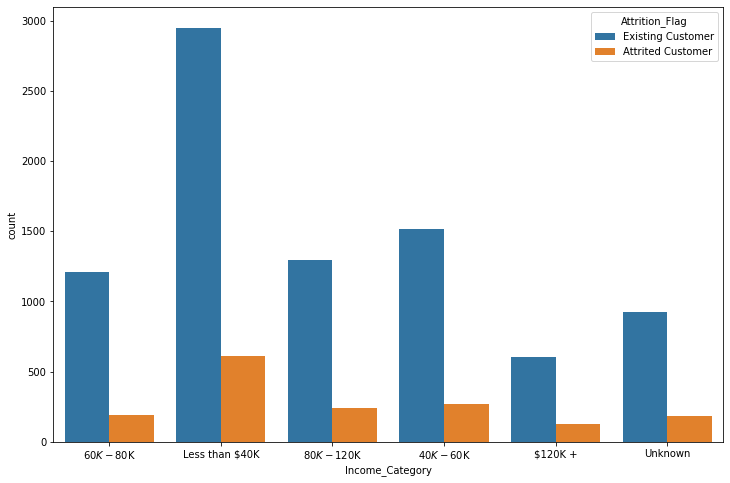

In [12]:
# Count plot for Income_Category
plt.figure(figsize = (12,8))
sns.countplot(x='Income_Category', data=df, hue = 'Attrition_Flag')

Less than $40K Income_Category customers are more likely to churn than any other category.

Let's have a look at the Card_Category :

<AxesSubplot:xlabel='Card_Category', ylabel='count'>

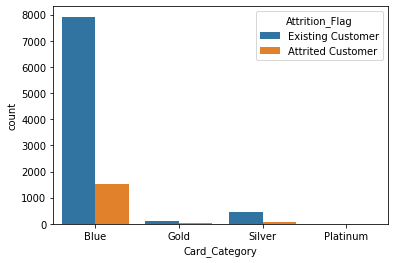

In [13]:
# Countplot for Card_Category
sns.countplot(x='Card_Category', data= df, hue = 'Attrition_Flag')

Blue card category customers have high attriration rate than any other category.

Let's look at the Total_Relationship_Count feature :

<AxesSubplot:xlabel='Total_Relationship_Count', ylabel='count'>

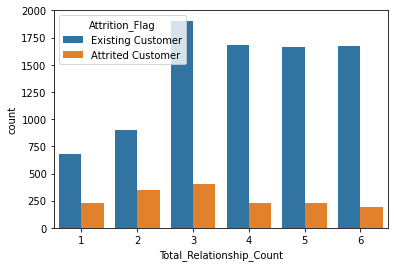

In [14]:
# Count plot for Total_Relationship_Count
sns.countplot(x='Total_Relationship_Count', data= df, hue = 'Attrition_Flag')

Customers who held 2 or 3 products are more likely to churn than other category.

Let's look at the Months_Inactive_12_mon feature :

<AxesSubplot:xlabel='Months_Inactive_12_mon', ylabel='count'>

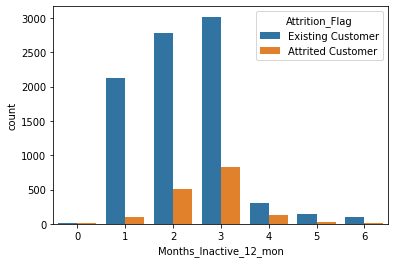

In [15]:
# Count plot for Months_Inactive_12_mon
sns.countplot(x='Months_Inactive_12_mon', data= df, hue = 'Attrition_Flag')

If the credit card is inactive for 3 or 2 months means those customers are more likely to churn.

Let's look at the Contacts_Count_12_mon feature :


<AxesSubplot:xlabel='Contacts_Count_12_mon', ylabel='count'>

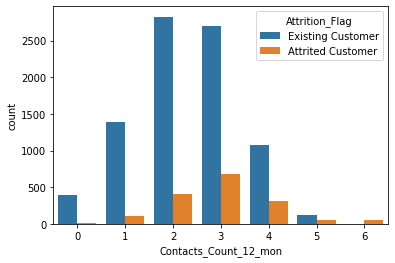

In [16]:
# Count plot for Contacts_Count_12_mon
sns.countplot(x='Contacts_Count_12_mon', data= df, hue = 'Attrition_Flag')

Attrition rate is high for customers who have the number of contacts as 3.

Let's have a look at the Customer_Age:

<AxesSubplot:xlabel='Customer_Age', ylabel='Density'>

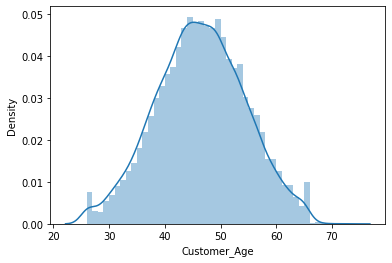

In [17]:
# Distribution plot for Customer_Age
sns.distplot(df.Customer_Age)

Age is ditributed normally.

Let's have a look at the Months_on_book:

<AxesSubplot:xlabel='Months_on_book', ylabel='Density'>

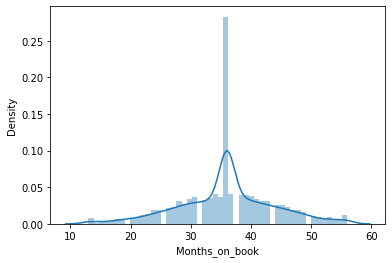

In [18]:
# Distribution plot for Months_on_book
sns.distplot(df['Months_on_book'])

Months_on_book distributed normally with high kurtosis.

Let's look at the Credit_Limit:

<AxesSubplot:xlabel='Credit_Limit', ylabel='Density'>

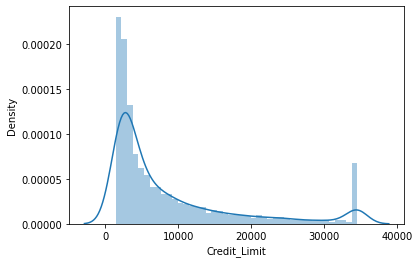

In [19]:
# Distribution plot for Credit_Limit
sns.distplot(df['Credit_Limit'])

Credit limit data is left skewed & not distributed normally. It seems most of the customers have credit limit less than 10000.

Let's look at the Total_Revolving_Bal.

<AxesSubplot:xlabel='Total_Revolving_Bal', ylabel='Density'>

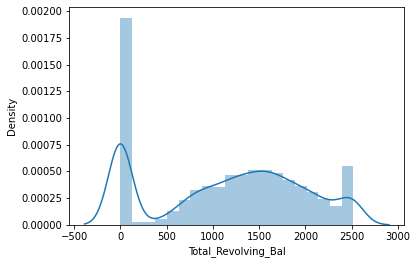

In [20]:
# Distribution plot for Total_Revolving_Bal
sns.distplot(df['Total_Revolving_Bal'])

Total_Revolving_Bal data is right skewed.

Let's look at the Avg_Open_To_Buy:

<AxesSubplot:xlabel='Avg_Open_To_Buy', ylabel='Density'>

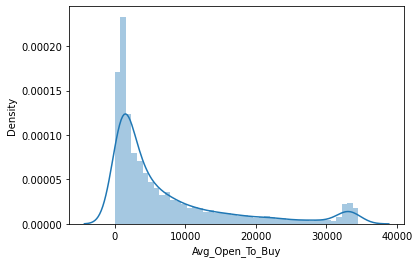

In [21]:
# Distribution plot for Avg_Open_To_Buy
sns.distplot(df['Avg_Open_To_Buy'])

Avg_Open_To_Buy data is left skewed & not distributed normally. It seems most of the customers have Avg_Open_To_Buy less than 10000.

Let's have a look at Total_Trans_Amt:

<AxesSubplot:xlabel='Total_Trans_Amt', ylabel='Density'>

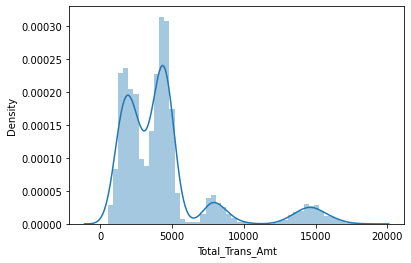

In [22]:
# Distribution plot for Total_Trans_Amt
sns.distplot(df['Total_Trans_Amt'])

Total_Trans_Amt data is left skewed & total transaction amount in last 12 months is less than 5000 for most of the customers.

Let's look at the Total_Trans_Ct:

<AxesSubplot:xlabel='Total_Trans_Ct', ylabel='Density'>

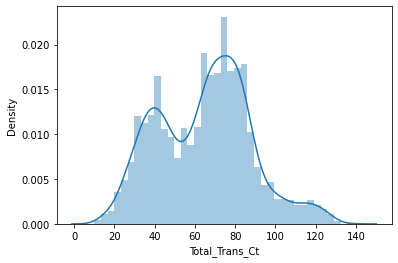

In [23]:
# Distribution plot for Total_Trans_Ct
sns.distplot(df['Total_Trans_Ct'])

Total_Trans_Ct data is left skewed.

Let's look at the Total_Ct_Chng_Q4_Q1:

<AxesSubplot:xlabel='Total_Ct_Chng_Q4_Q1', ylabel='Density'>

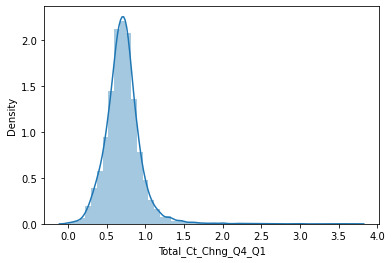

In [24]:
# Distribution plot for Total_Ct_Chng_Q4_Q1
sns.distplot(df['Total_Ct_Chng_Q4_Q1'])

Total_Ct_Chng_Q4_Q1 data is left skewed & values are distributed between 0.0 & 1.5.

Let's look at Total_Amt_Chng_Q4_Q1:

<AxesSubplot:xlabel='Total_Amt_Chng_Q4_Q1', ylabel='Density'>

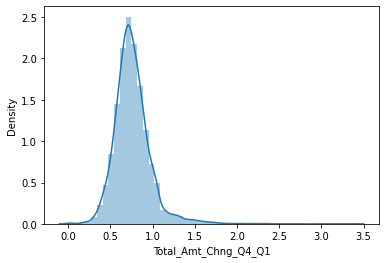

In [25]:
# Distribution plot for Total_Amt_Chng_Q4_Q1
sns.distplot(df['Total_Amt_Chng_Q4_Q1'])

Total_Amt_Chng_Q4_Q1 data is left skewed.

Let's look at the Avg_Utilization_Ratio:

<AxesSubplot:xlabel='Avg_Utilization_Ratio', ylabel='Density'>

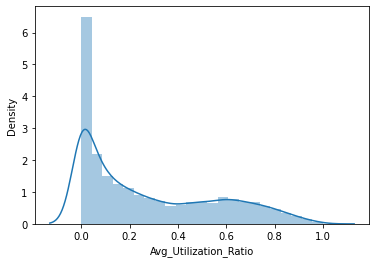

In [26]:
# Distribution plot for Avg_Utilization_Ratio
sns.distplot(df['Avg_Utilization_Ratio'])

Avg_Utilization_Ratio data is left skewed.

In [27]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

**Bivariate Analysis**

Relation between Months_on_book & Credit_Limit

<AxesSubplot:xlabel='Months_on_book', ylabel='Credit_Limit'>

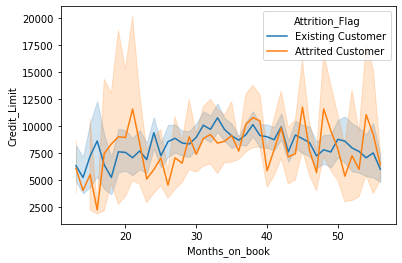

In [28]:
# Line plot
sns.lineplot(x='Months_on_book',y='Credit_Limit', data= df, hue = 'Attrition_Flag')

Insights:   
*  It seems Months_on_book feature doesn't have much imapct on credit limit for both existing & attrited customer.

Relation between Credit_Limit & Avg_Open_To_Buy

<AxesSubplot:xlabel='Avg_Open_To_Buy', ylabel='Credit_Limit'>

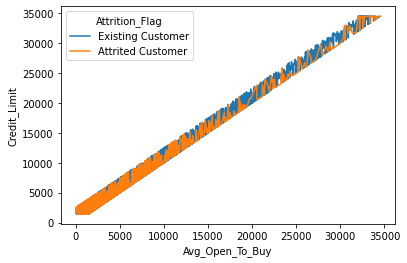

In [29]:
# Line plot
sns.lineplot(x='Avg_Open_To_Buy',y='Credit_Limit', data= df, hue = 'Attrition_Flag')

Insights:    
*  Avg_Open_To_Buy is directly proportional to Credit limit.

Relation between Total_Amt_Chng_Q4_Q1 & Total_Trans_Amt.

<AxesSubplot:xlabel='Total_Trans_Amt', ylabel='Total_Amt_Chng_Q4_Q1'>

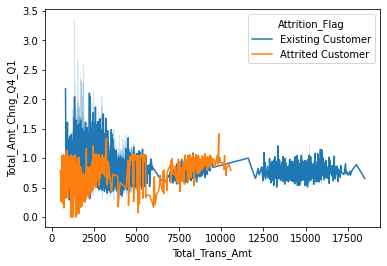

In [30]:
# Line plot
sns.lineplot(x='Total_Trans_Amt',y='Total_Amt_Chng_Q4_Q1', data= df, hue = 'Attrition_Flag')

Insights:        
*  There is no trend between Total_Trans_Amt &  Total_Amt_Chng_Q4_Q1.

Relation between Avg_Utilization_Ratio & Total_Trans_Amt.

<AxesSubplot:xlabel='Avg_Utilization_Ratio', ylabel='Total_Trans_Amt'>

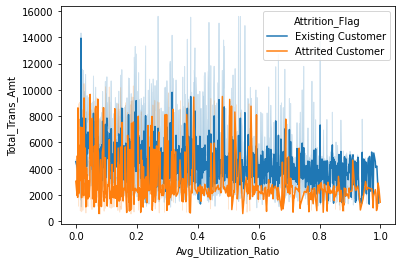

In [31]:
# Line plot
sns.lineplot(y='Total_Trans_Amt',x='Avg_Utilization_Ratio', data= df, hue = 'Attrition_Flag')

Insights:
* There is no trend between Avg_Utilization_Ratio & Total_Trans_Amt.
* Total transaction amount for existing customers is more than attrited customers.

**Data pre-processing**

**Missing value analysis**

Check if any null values in the dataset.

In [32]:
null_values = df.isnull().sum()/len(df)
null_values

CLIENTNUM                   0.0
Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64

Null values are not present in our data.

**Typecast**

In [33]:
# Check data types
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

Convert object types to category.

In [34]:
# Object to category
cols = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
for col in cols:
  df[col] = df[col].astype('category')

In [35]:
df.dtypes

CLIENTNUM                      int64
Attrition_Flag              category
Customer_Age                   int64
Gender                      category
Dependent_count                int64
Education_Level             category
Marital_Status              category
Income_Category             category
Card_Category               category
Months_on_book                 int64
Total_Relationship_Count       int64
Months_Inactive_12_mon         int64
Contacts_Count_12_mon          int64
Credit_Limit                 float64
Total_Revolving_Bal            int64
Avg_Open_To_Buy              float64
Total_Amt_Chng_Q4_Q1         float64
Total_Trans_Amt                int64
Total_Trans_Ct                 int64
Total_Ct_Chng_Q4_Q1          float64
Avg_Utilization_Ratio        float64
dtype: object

**Encode categorical features**


In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [37]:
for col in cols:
  df[col] = le.fit_transform(df[col])

In [38]:
# Check df
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,3,1,2,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,2,2,4,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,2,1,3,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,3,3,4,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,1,3,5,1,2,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


**Check duplicates if any**

In [39]:
df.duplicated().sum()

0

No duplicates are present in our data.

**Outlier treatment**

Using scipy.stats.zscore() to remove outliers from dataset if they are present.

In [40]:
from scipy.stats import zscore

In [41]:
# calculate z-scores of `df`
z_scores = zscore(df)
# Absolute values
abs_z_scores = np.abs(z_scores)

In [42]:
# Check outliers, if zscore>3 means the data point is an outlier
# Let's find outliers
filtered_entries = (abs_z_scores > 3).all(axis=1)
df_outliers = df[filtered_entries]
print(f'Number of outliers present in our dataset is {len(df_outliers)}')

Number of outliers present in our dataset is 0


It seems no outlier is present in our data.

### Distribution of classes in Attrition_Flag attribute (target variable)

Count of Attrition_Flag :
 1    8500
0    1627
Name: Attrition_Flag, dtype: int64
percentage of Attrition_Flag count :
 1    83.934038
0    16.065962
Name: Attrition_Flag, dtype: float64
CPU times: user 79.4 ms, sys: 4.06 ms, total: 83.4 ms
Wall time: 90.9 ms


Text(0, 0.5, 'Index')

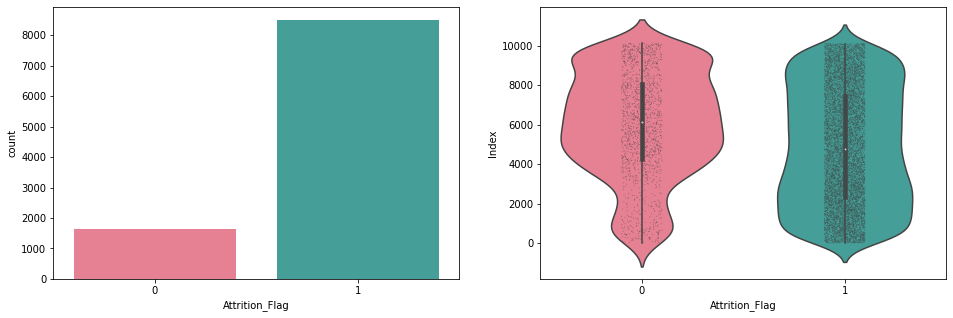

In [43]:
%%time
#Attrition_Flag count
df_label=df['Attrition_Flag'].value_counts()
print('Count of Attrition_Flag :\n',df_label)
#Percentage of Attrition_Flag count
per_label=df['Attrition_Flag'].value_counts()/len(df)*100
print('percentage of Attrition_Flag count :\n',per_label)

#Countplot and violin plot for Attrition_Flag
fig,ax=plt.subplots(1,2,figsize=(16,5))
sns.countplot(df.Attrition_Flag.values,ax=ax[0],palette='husl')
sns.violinplot(x=df.Attrition_Flag.values,y=df.index.values,ax=ax[1],palette='husl')
sns.stripplot(x=df.Attrition_Flag.values,y=df.index.values,jitter=True,color='black',linewidth=0.5,size=0.5,alpha=0.5,ax=ax[1],palette='husl')
ax[0].set_xlabel('Attrition_Flag')
ax[1].set_xlabel('Attrition_Flag')
ax[1].set_ylabel('Index')

Take aways:

* We have imbalanced data, where ~84% of the data is the number of existing customers and 16% of the data is those customers who are churned.
* If you look at the jitter in violin plot, we can say that Attrition_Flag distributed uniformly over the indexs of the dataframe and Also we can observe the imbalanced class distribution where the  class 1 is most densely distributed than the class 0.

In [44]:
# Create features & target 
X_features = df.drop(['Attrition_Flag','CLIENTNUM'],axis=1)
y = df['Attrition_Flag'].astype('uint8')

### Split the dataset for training, & testing.

In [45]:
#Split the data into train (80%), & test set (20%).
X_train,X_test,y_train,y_test=train_test_split(X_features, y, random_state=42, test_size=0.2)

In [46]:
print(f'Train dataset shape : {X_train.shape}, {y_train.shape}')
print(f'Test dataset shape : {X_test.shape}, {y_test.shape}')

Train dataset shape : (8101, 19), (8101,)
Test dataset shape : (2026, 19), (2026,)


### Feature selection

**Chi-Square test for selecting best features**

A chi-square test is used in statistics to test the independence of two events. In our case, we used to determine the relationship between independent variables (features) & dependent variable (response or target). In simple words, higher the Chi-Square value the feature is more dependent on the response and it can be selected for model training.

In [47]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [48]:
# Extract top 15 best features
bestfeatures = SelectKBest(score_func=chi2, k=15)
bf = bestfeatures.fit(X_train, y_train)
dfscores = pd.DataFrame(bf.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

In [49]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['features','Score'] 
print(featureScores.nlargest(15,'Score'))

                    features          Score
15           Total_Trans_Amt  675073.294014
12       Total_Revolving_Bal  321923.030489
11              Credit_Limit   46239.199977
16            Total_Trans_Ct   10031.939814
10     Contacts_Count_12_mon     178.854153
8   Total_Relationship_Count     116.466418
9     Months_Inactive_12_mon      87.004654
18     Avg_Utilization_Ratio      72.305735
13           Avg_Open_To_Buy      57.583258
17       Total_Ct_Chng_Q4_Q1      54.383153
0               Customer_Age      13.951907
1                     Gender       9.606662
14      Total_Amt_Chng_Q4_Q1       8.260397
7             Months_on_book       7.200738
5            Income_Category       5.011688


In [50]:
best_features = featureScores.nlargest(15,'Score')
best_columns = best_features.features.tolist()
# Top 15 features
best_columns

['Total_Trans_Amt',
 'Total_Revolving_Bal',
 'Credit_Limit',
 'Total_Trans_Ct',
 'Contacts_Count_12_mon',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Avg_Utilization_Ratio',
 'Avg_Open_To_Buy',
 'Total_Ct_Chng_Q4_Q1',
 'Customer_Age',
 'Gender',
 'Total_Amt_Chng_Q4_Q1',
 'Months_on_book',
 'Income_Category']

**Total_Trans_Amt** feature plays most important role in predicting users churn.

In [51]:
# Update X_train, X_test for best_columns
X_train_best = X_train[best_columns]
X_test_best = X_test[best_columns]

In [52]:
X_train_best.head()

,Total_Trans_Amt,Total_Revolving_Bal,Credit_Limit,Total_Trans_Ct,Contacts_Count_12_mon,Total_Relationship_Count,Months_Inactive_12_mon,Avg_Utilization_Ratio,Avg_Open_To_Buy,Total_Ct_Chng_Q4_Q1,Customer_Age,Gender,Total_Amt_Chng_Q4_Q1,Months_on_book,Income_Category
9066,8554,1728,3723.0,99,3,1,3,0.464,1995.0,0.678,54,0,0.595,36,5
5814,2107,1803,5396.0,39,3,1,4,0.334,3593.0,0.393,58,0,0.493,48,5
792,1436,1648,15987.0,36,3,6,1,0.103,14339.0,1.250,45,0,0.732,36,4
1791,2616,2517,3625.0,46,4,4,3,0.694,1108.0,1.300,34,0,1.158,36,4
5011,3806,1926,2720.0,61,4,5,3,0.708,794.0,0.794,49,0,0.602,39,1


### Correlation matrix

Plot correlation matrix using heatmap to check how the features are correlated.

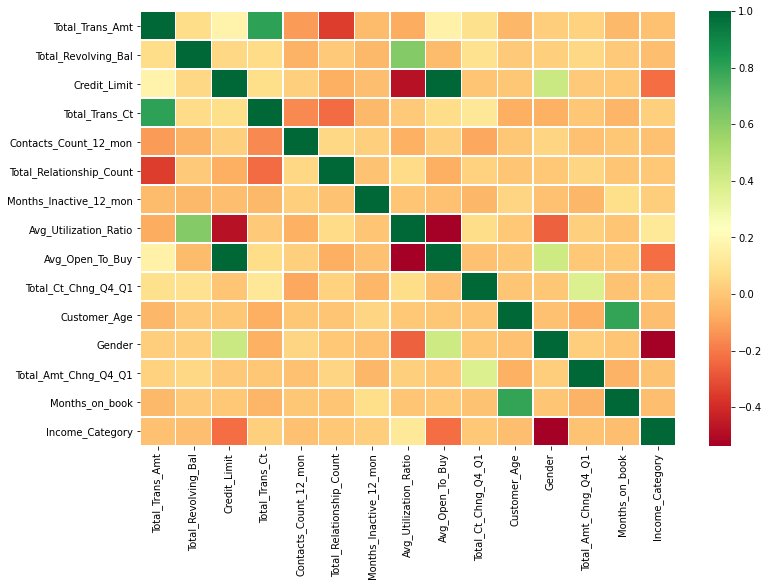

In [53]:
plt.figure(figsize = (12,8))
df_corr = X_train_best.corr()
sns.heatmap(df_corr,fmt = "", cmap = "RdYlGn", linewidth = 0.30)
plt.show()

Insights:
* Avg_Open_To_Buy & Credit_Limit features have high positive correlation.

So, we will drop Avg_Open_To_Buy feature from our data.

In [54]:
X_train_best = X_train_best.drop('Avg_Open_To_Buy', axis=1)
X_test_best = X_test_best.drop('Avg_Open_To_Buy', axis=1)

### Data Scaling

In [55]:
# Select numerical columns
numerical_cols = X_train_best.select_dtypes(include = [np.float64, np.int64]).columns

In [56]:
numerical_cols

Index(['Total_Trans_Amt', 'Total_Revolving_Bal', 'Credit_Limit',
       'Total_Trans_Ct', 'Contacts_Count_12_mon', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Avg_Utilization_Ratio',
       'Total_Ct_Chng_Q4_Q1', 'Customer_Age', 'Gender', 'Total_Amt_Chng_Q4_Q1',
       'Months_on_book', 'Income_Category'],
      dtype='object')

In [57]:
# Scale our continuous data in the range of 0 & 1
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# fit the train data
scaler.fit(X_train_best[numerical_cols])
# Transform the data
X_train_best[numerical_cols] = scaler.transform(X_train_best[numerical_cols])
X_test_best[numerical_cols] = scaler.transform(X_test_best[numerical_cols])

In [58]:
# Create a dataframe for scaled train & test data
x_train_scaled = pd.DataFrame(X_train_best, columns=X_train_best.columns)
x_test_scaled = pd.DataFrame(X_test_best, columns=X_test_best.columns)

In [59]:
x_train_scaled.head()

,Total_Trans_Amt,Total_Revolving_Bal,Credit_Limit,Total_Trans_Ct,Contacts_Count_12_mon,Total_Relationship_Count,Months_Inactive_12_mon,Avg_Utilization_Ratio,Total_Ct_Chng_Q4_Q1,Customer_Age,Gender,Total_Amt_Chng_Q4_Q1,Months_on_book,Income_Category
9066,0.447535,0.686532,0.069071,0.689922,0.500000,0.0,0.500000,0.464464,0.182553,0.636364,0.0,0.222430,0.534884,1.0
5814,0.088851,0.716329,0.119649,0.224806,0.500000,0.0,0.666667,0.334334,0.105816,0.727273,0.0,0.184299,0.813953,1.0
792,0.051519,0.654748,0.439834,0.201550,0.500000,1.0,0.166667,0.103103,0.336564,0.431818,0.0,0.273645,0.534884,0.8
1791,0.117169,1.000000,0.066108,0.279070,0.666667,0.6,0.500000,0.694695,0.350027,0.181818,0.0,0.432897,0.534884,0.8
5011,0.183376,0.765197,0.038748,0.395349,0.666667,0.8,0.500000,0.708709,0.213786,0.522727,0.0,0.225047,0.604651,0.2


### Model building - Logistic Regression

We will build 3 models using Logistic Regression technique.
* Simple Logistic Regression
* Logistic Regression with Upsampling
* Logistic Regression with downsampling

In [60]:
from sklearn.linear_model import LogisticRegression

**Simple Logistic Regression**

In [61]:
# Initialize the Logistic Regression
lr = LogisticRegression()
# Fit the model
lr.fit(x_train_scaled, y_train)

LogisticRegression()

In [62]:
#Accuracy of the model
lr_score=lr.score(x_train_scaled, y_train)
print('Accuracy of the trained lr model :', round(lr_score, 3))

Accuracy of the trained lr model : 0.902


Logistic regression classifier performance on test data

In [63]:
#Predictions on test data
y_predict= lr.predict(x_test_scaled)
y_pred_prob = lr.predict_proba(x_test_scaled)
y_predict

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

Evaluating Logistic regression

Accuracy of the model is not the best metric to use when evaluating the model on imbalanced datasets as it may be misleading. So, we are going to use Confusion matrix, & AUC score from ROC for checking model performance.

Confusion matrix

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

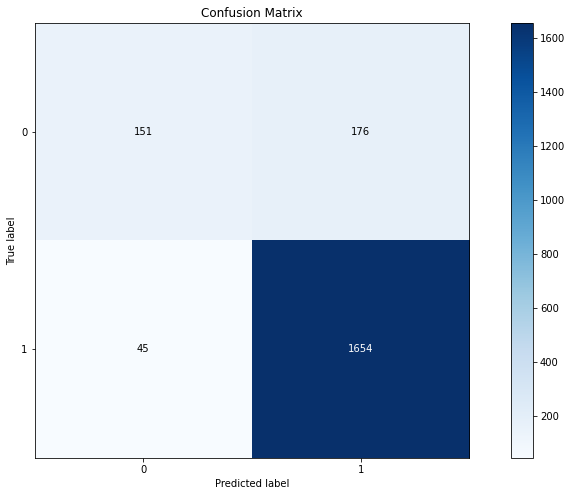

In [64]:
#Plot the confusion matrix
plot_confusion_matrix(y_test, y_predict, normalize=False,figsize=(15,8))

Out of 2026 samples , 221 are misclassified.

In [65]:
# Classification report
class_report= classification_report(y_test, y_predict)
print(class_report)

              precision    recall  f1-score   support

           0       0.77      0.46      0.58       327
           1       0.90      0.97      0.94      1699

    accuracy                           0.89      2026
   macro avg       0.84      0.72      0.76      2026
weighted avg       0.88      0.89      0.88      2026



AUC- ROC curve

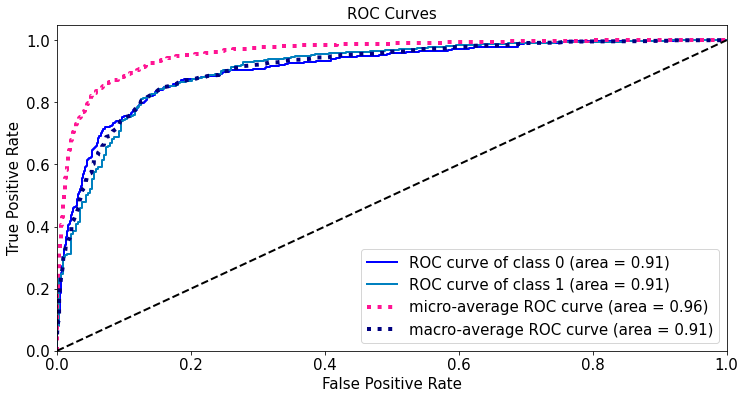

In [66]:
# Plot ROC curve
skplt.metrics.plot_roc(y_test, y_pred_prob, figsize = (12,6), text_fontsize = 15, title_fontsize = 15,
                      cmap = 'winter')
plt.show()

Insights:
* It seems Logistic regression model performing well with AUC score of 0.91.

**Logistic Regression with Upsampling**

In this we are using SMOTE upsampling technique to balance classes as these are imbalanced.

In [67]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [68]:
counter= Counter(y_train)
print(f'Before Sampling', counter)
# Upsampling the train data using SMOTE
smt=SMOTE(random_state=42)
x_train_sm,y_train_sm = smt.fit_resample(x_train_scaled,y_train)
counter= Counter(y_train_sm)
print('After Sampling', counter)

Before Sampling Counter({1: 6801, 0: 1300})
After Sampling Counter({1: 6801, 0: 6801})


In [69]:
# Fit logistic regression model on upsampled data
lr_sm  = LogisticRegression(random_state = 42)
lr_sm.fit(x_train_sm, y_train_sm)

LogisticRegression(random_state=42)

In [70]:
#Accuracy of the model
lr_score_up=lr_sm.score(x_train_sm, y_train_sm)
print('Accuracy of the trained lr model with Upsampling :', round(lr_score_up, 3))

Accuracy of the trained lr model with Upsampling : 0.858


In [71]:
#Predictions on test data
y_predict= lr_sm.predict(x_test_scaled)
y_pred_prob = lr_sm.predict_proba(x_test_scaled)
y_predict

array([1, 1, 1, ..., 1, 0, 1], dtype=uint8)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

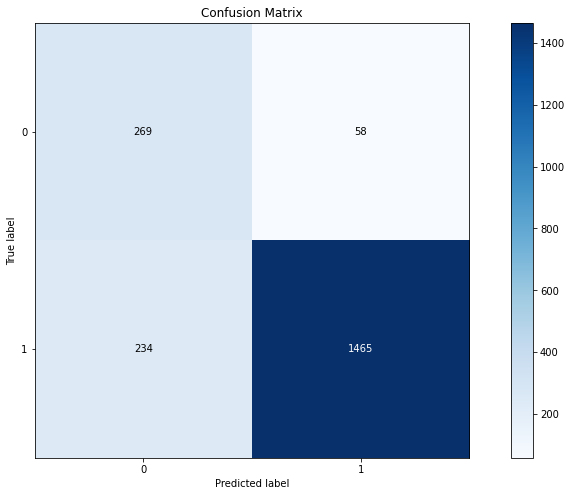

In [72]:
#Plot the confusion matrix
plot_confusion_matrix(y_test, y_predict, normalize=False,figsize=(15,8))

Out of 2026 samples, 292 are misclassified.

In [73]:
# Classification report
class_report= classification_report(y_test, y_predict)
print(class_report)

              precision    recall  f1-score   support

           0       0.53      0.82      0.65       327
           1       0.96      0.86      0.91      1699

    accuracy                           0.86      2026
   macro avg       0.75      0.84      0.78      2026
weighted avg       0.89      0.86      0.87      2026



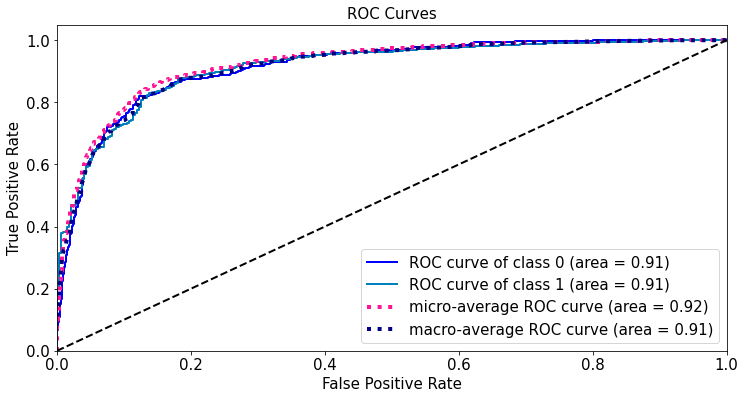

In [74]:
# Plot ROC curve
skplt.metrics.plot_roc(y_test, y_pred_prob, figsize = (12,6), text_fontsize = 15, title_fontsize = 15,
                      cmap = 'winter')
plt.show()

Insights:
* SMOTE Upsampling not have much impact on Logistic regression model with an AUC score of 0.91 as same as for simple logistic regression.

**Logistic Regression with downsampling**

We are using CondensedNearestNeighbour  technique to downsample the data there by balancing classes.

In [75]:
from imblearn.under_sampling import CondensedNearestNeighbour 

In [76]:
counter= Counter(y_train)
print(f'Before Sampling', counter)
# Downsampling the train data using CondensedNearestNeighbour 
cnn = CondensedNearestNeighbour(random_state = 42)
x_train_cnn,y_train_cnn = cnn.fit_resample(x_train_scaled,y_train)
counter= Counter(y_train_cnn)
print('After Sampling', counter)

Before Sampling Counter({1: 6801, 0: 1300})
After Sampling Counter({1: 1371, 0: 1300})


In [77]:
# Fit logistic regression model on downsampled data
lr_cnn  = LogisticRegression(random_state = 42)
lr_cnn.fit(x_train_cnn, y_train_cnn)

LogisticRegression(random_state=42)

In [78]:
#Accuracy of the model
lr_score_down=lr_cnn.score(x_train_cnn, y_train_cnn)
print('Accuracy of the trained lr model with downsampling :', round(lr_score_down, 3))

Accuracy of the trained lr model with downsampling : 0.777


In [79]:
#Predictions on test data
y_predict= lr_cnn.predict(x_test_scaled)
y_pred_prob = lr_cnn.predict_proba(x_test_scaled)
y_predict

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

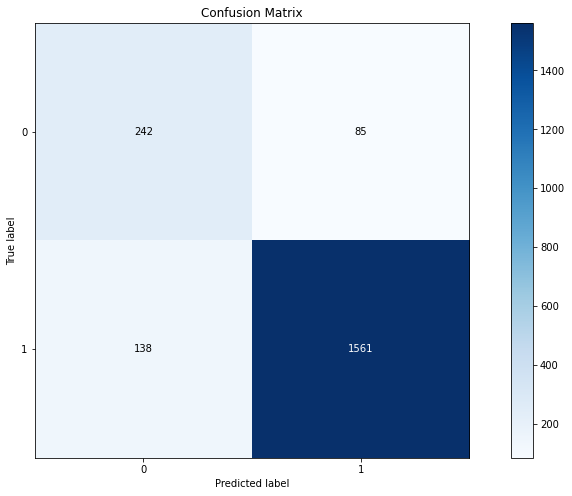

In [80]:
#Plot the confusion matrix
plot_confusion_matrix(y_test, y_predict, normalize=False,figsize=(15,8))

Out of 2026 samples, 223 are misclassified.

In [81]:
# Classification report
class_report= classification_report(y_test, y_predict)
print(class_report)

              precision    recall  f1-score   support

           0       0.64      0.74      0.68       327
           1       0.95      0.92      0.93      1699

    accuracy                           0.89      2026
   macro avg       0.79      0.83      0.81      2026
weighted avg       0.90      0.89      0.89      2026



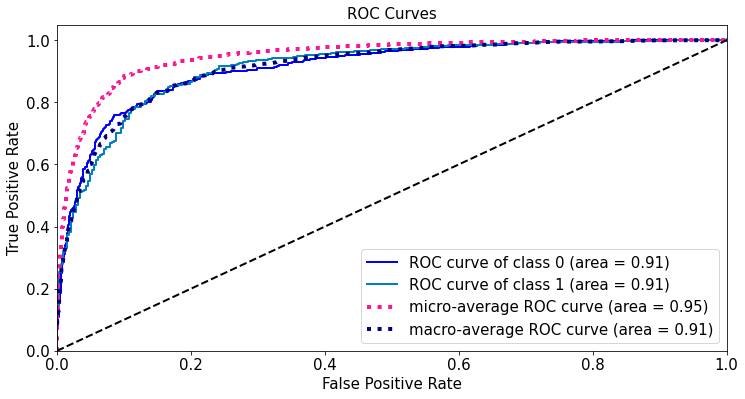

In [82]:
# Plot ROC curve
skplt.metrics.plot_roc(y_test, y_pred_prob, figsize = (12,6), text_fontsize = 15, title_fontsize = 15,
                      cmap = 'winter')
plt.show()

Insights:
* No changes in model performance using downsampling technique compared to a simple logistic regression.

**Model building - Bagging and Boosting**

We are building 3 Bagging models for this task:
* Bagging Classifier    
* Random Forest     
* Decision tree

We are building 3 Boosting models for this task:
* Adaboost Classifier    
* Gradient boost        
* XGboost            

**Bagging Classifier**

In [83]:
from sklearn.ensemble import BaggingClassifier
#BaggingClassifier
bag_model=BaggingClassifier(random_state=42)
#fitting the bag model
bag_model.fit(x_train_scaled, y_train)

BaggingClassifier(random_state=42)

In [84]:
#Accuracy of the model
bag_score=bag_model.score(x_train_scaled, y_train)
print('Accuracy of the trained bag_model :', round(bag_score, 3))

Accuracy of the trained bag_model : 0.997


### Bagging classifier performance on test data

In [85]:
#Predictions on validation
y_predict= bag_model.predict(x_test_scaled)
y_pred_prob = bag_model.predict_proba(x_test_scaled)
y_predict

array([1, 1, 1, ..., 1, 0, 1], dtype=uint8)

### Bagging classifier model evaluation

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

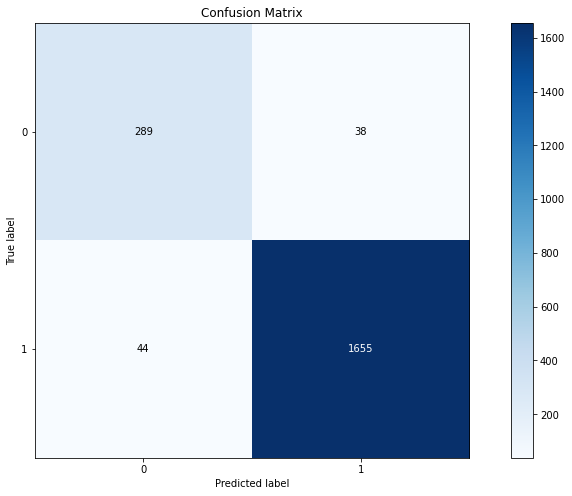

In [86]:
#Confusion matrix
cm=confusion_matrix(y_test, y_predict)
#Plot the confusion matrix
plot_confusion_matrix(y_test, y_predict, normalize=False,figsize=(15,8))

Out of 2026 samples, 82 are classified incorrectly.

In [87]:
# Classification report
class_report= classification_report(y_test, y_predict)
print(class_report)

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       327
           1       0.98      0.97      0.98      1699

    accuracy                           0.96      2026
   macro avg       0.92      0.93      0.93      2026
weighted avg       0.96      0.96      0.96      2026



## AUC- ROC curve

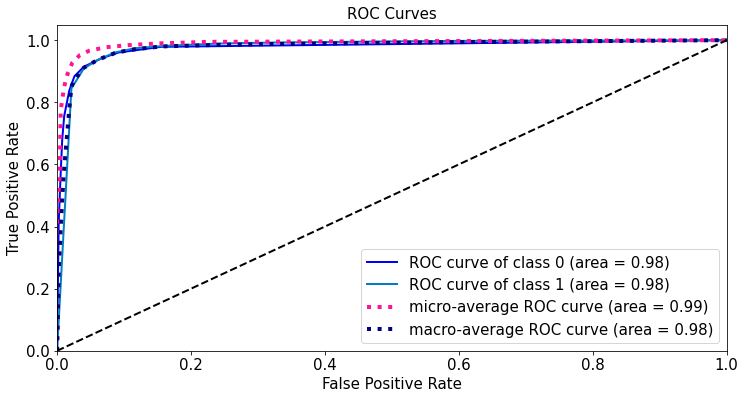

In [88]:
# Plot ROC curve
skplt.metrics.plot_roc(y_test, y_pred_prob, figsize = (12,6), text_fontsize = 15, title_fontsize = 15,
                      cmap = 'winter')
plt.show()

Insights:
* Great, the bagging classifier performing well with AUC score of 0.98.

**Random Forest Classifier**

In [89]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf_model = RandomForestClassifier()

# Fit model on training data
rf_model.fit(x_train_scaled, y_train)

RandomForestClassifier()

In [90]:
#Accuracy of the model
rf_score=rf_model.score(x_train_scaled, y_train)
print('Accuracy of the trained rf_model :', round(rf_score, 3))

Accuracy of the trained rf_model : 1.0


### Random Foreset classifier performance on test data

In [91]:
#model prediction
y_predict_rf= rf_model.predict(x_test_scaled)
y_pred_prob_rf = rf_model.predict_proba(x_test_scaled)
y_predict_rf

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

### Random forest classifier model evaluation

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

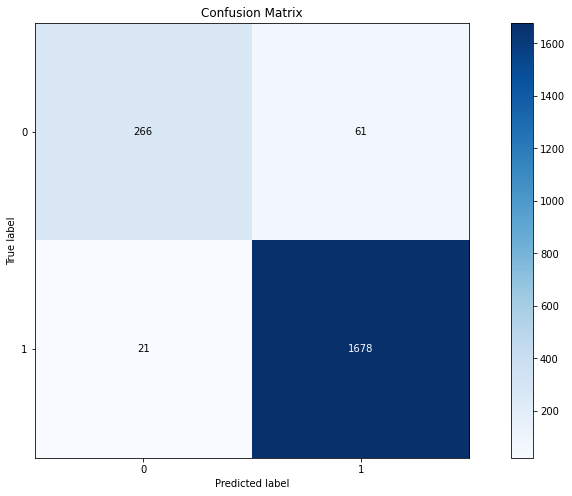

In [92]:
#Confusion matrix
cm=confusion_matrix(y_test, y_predict_rf)
#Plot the confusion matrix
plot_confusion_matrix(y_test, y_predict_rf, normalize=False,figsize=(15,8))

Out of 2026 samples, 81 samples are classified incorrectly.

In [93]:
# Classification report
class_report= classification_report(y_test, y_predict_rf)
print(class_report)

              precision    recall  f1-score   support

           0       0.93      0.81      0.87       327
           1       0.96      0.99      0.98      1699

    accuracy                           0.96      2026
   macro avg       0.95      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026



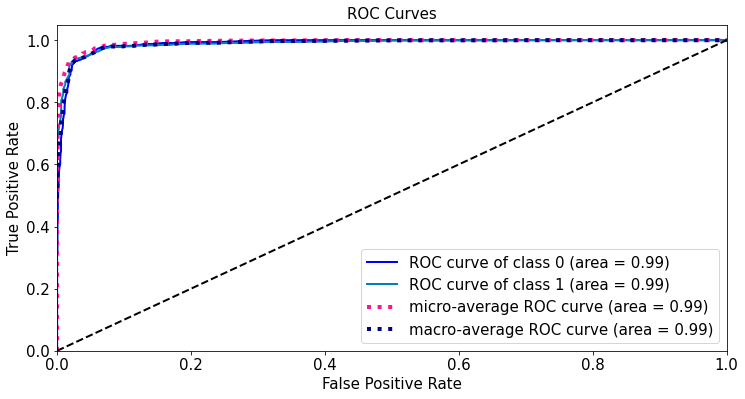

In [94]:
#ROC_AUC curve
# Plot ROC curve
skplt.metrics.plot_roc(y_test, y_pred_prob_rf, figsize = (12,6), text_fontsize = 15, title_fontsize = 15,
                      cmap = 'winter')
plt.show()

Insights:
* AUC of 0.99 means the model is making best guesses. It seems Random forest classifier is not sensitive to the imbalanced data.

**Decision tree classifier**

In [95]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier
dt_model = DecisionTreeClassifier()

# Fit model on training data
dt_model.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [96]:
#Accuracy of the model
dt_score=dt_model.score(x_train_scaled, y_train)
print('Accuracy of the trained dt_model :', round(dt_score, 3))

Accuracy of the trained dt_model : 1.0


### Decision tree classifier performance on test data

In [97]:
#model prediction
y_predict_dt= dt_model.predict(x_test_scaled)
y_pred_prob_dt = dt_model.predict_proba(x_test_scaled)
y_predict_dt

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

### Decision tree classifier model evaluation

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

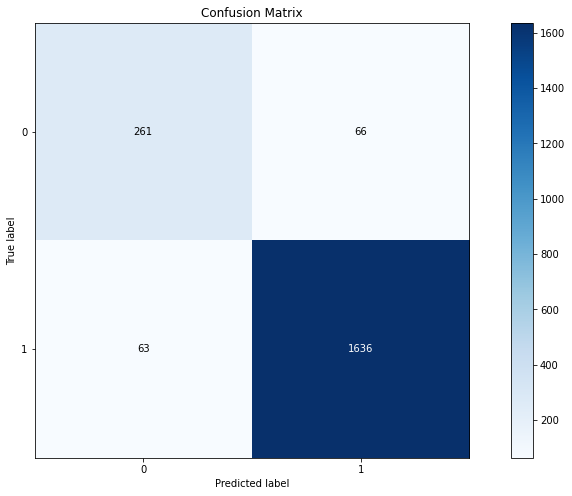

In [98]:
#Confusion matrix
cm=confusion_matrix(y_test, y_predict_dt)
#Plot the confusion matrix
plot_confusion_matrix(y_test, y_predict_dt, normalize=False,figsize=(15,8))

Out of 2026 samples, 139 samples are classified incorrectly.

In [99]:
#Classification report
class_report= classification_report(y_test, y_predict_dt)
print(class_report)

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       327
           1       0.96      0.96      0.96      1699

    accuracy                           0.94      2026
   macro avg       0.88      0.88      0.88      2026
weighted avg       0.94      0.94      0.94      2026



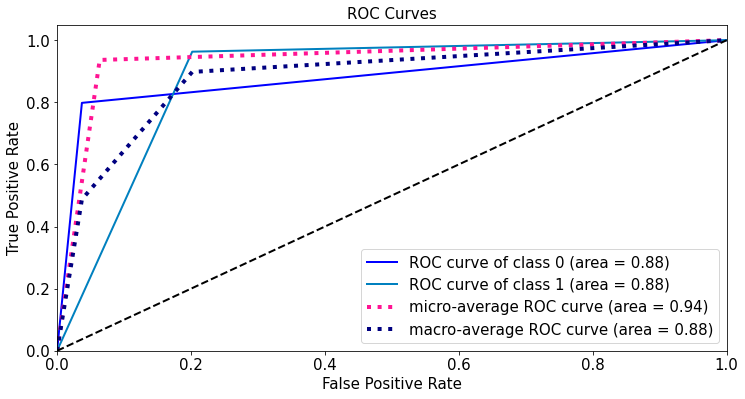

In [100]:
#ROC_AUC curve
# Plot ROC curve
skplt.metrics.plot_roc(y_test, y_pred_prob_dt, figsize = (12,6), text_fontsize = 15, title_fontsize = 15,
                      cmap = 'winter')
plt.show()

Insights:
* It appears the Decision tree classifier is making good guesses with AUC score of 0.88.

**Adaboost Classifier**

In [101]:
from sklearn.ensemble import AdaBoostClassifier

# Adaboost Classifier
ada_model = AdaBoostClassifier()

# Fit model on training data
ada_model.fit(x_train_scaled, y_train)

AdaBoostClassifier()

In [102]:
#Accuracy of the model
ada_score=ada_model.score(x_train_scaled, y_train)
print('Accuracy of the trained ad_model :', round(ada_score, 3))

Accuracy of the trained ad_model : 0.963


### Adaboost classifier performance on test data

In [103]:
#model prediction
y_predict_ad= ada_model.predict(x_test_scaled)
y_pred_prob_ad = ada_model.predict_proba(x_test_scaled)
y_predict_ad

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

### Adaboost classifier model evaluation

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

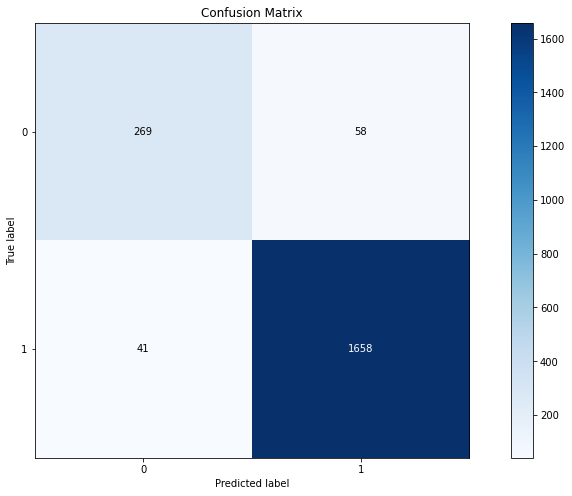

In [104]:
#Confusion matrix
cm=confusion_matrix(y_test, y_predict_ad)
#Plot the confusion matrix
plot_confusion_matrix(y_test, y_predict_ad, normalize=False,figsize=(15,8))

Out of 2026 samples, 99 are classified incorrectly.

In [105]:
#Classification report
class_report= classification_report(y_test, y_predict_ad)
print(class_report)

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       327
           1       0.97      0.98      0.97      1699

    accuracy                           0.95      2026
   macro avg       0.92      0.90      0.91      2026
weighted avg       0.95      0.95      0.95      2026



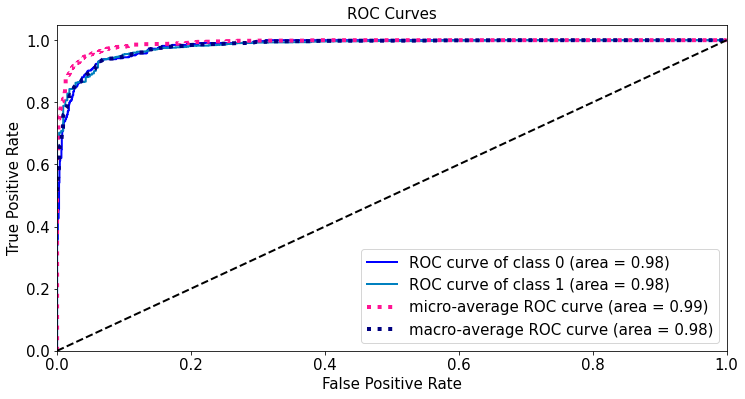

In [106]:
#ROC_AUC curve
# Plot ROC curve
skplt.metrics.plot_roc(y_test, y_pred_prob_ad, figsize = (12,6), text_fontsize = 15, title_fontsize = 15,
                      cmap = 'winter')
plt.show()

Insights:
* It seems the Adaboost classifier is making great guesses with AUC score of 0.98.

**Gradient boost**

In [107]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient boost Classifier
grad_model = GradientBoostingClassifier()

# Fit model on training data
grad_model.fit(x_train_scaled, y_train)

GradientBoostingClassifier()

In [108]:
#Accuracy of the model
grad_score=grad_model.score(x_train_scaled, y_train)
print('Accuracy of the trained grad_model :', round(grad_score, 3))

Accuracy of the trained grad_model : 0.976


## Gradient boosting classifier performance on test data

In [109]:
#model prediction
y_predict_grd= grad_model.predict(x_test_scaled)
y_pred_prob_grd = grad_model.predict_proba(x_test_scaled)
y_predict_grd

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

### Gradient boosting classifier model evaluation

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

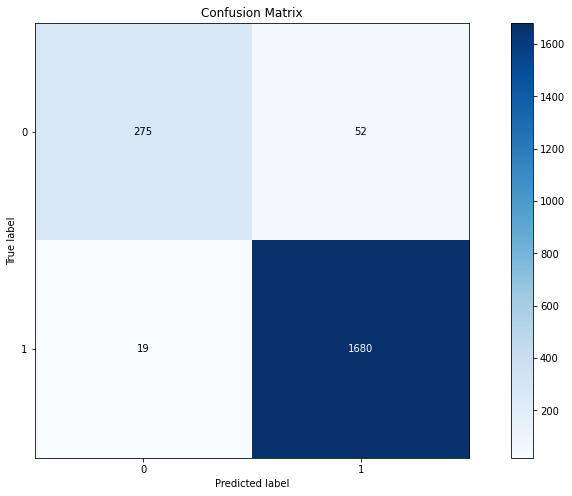

In [110]:
#Confusion matrix
cm=confusion_matrix(y_test, y_predict_grd)
#Plot the confusion matrix
plot_confusion_matrix(y_test, y_predict_grd, normalize=False,figsize=(15,8))

Out of 2026 samples, 70 samples are classified incorrectly.

In [111]:
#Classification report
class_report= classification_report(y_test, y_predict_grd)
print(class_report)

              precision    recall  f1-score   support

           0       0.94      0.84      0.89       327
           1       0.97      0.99      0.98      1699

    accuracy                           0.96      2026
   macro avg       0.95      0.91      0.93      2026
weighted avg       0.96      0.96      0.96      2026



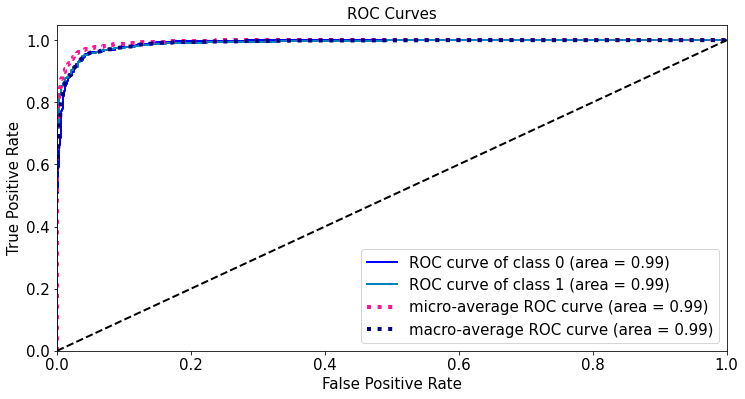

In [112]:
#ROC_AUC curve
# Plot ROC curve
skplt.metrics.plot_roc(y_test, y_pred_prob_grd, figsize = (12,6), text_fontsize = 15, title_fontsize = 15,
                      cmap = 'winter')
plt.show()

Insights:

Gradient boosting classifier is performing well with AUC score of 0.99.

**XGBoost**

In [113]:
from xgboost import XGBClassifier

# XGB Classifier
xgb_model = XGBClassifier()

# Fit model on training data
xgb_model.fit(x_train_scaled, y_train)

[12:48:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [114]:
#Accuracy of the model
xgb_score=xgb_model.score(x_train_scaled, y_train)
print('Accuracy of the trained xgb_model :', round(xgb_score, 3))

Accuracy of the trained xgb_model : 1.0


XGB classifier performance on test data

In [115]:
#model prediction
y_predict_xgb= xgb_model.predict(x_test_scaled)
y_pred_prob_xgb = xgb_model.predict_proba(x_test_scaled)
y_predict_xgb

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

### XGB classifier model evaluation

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

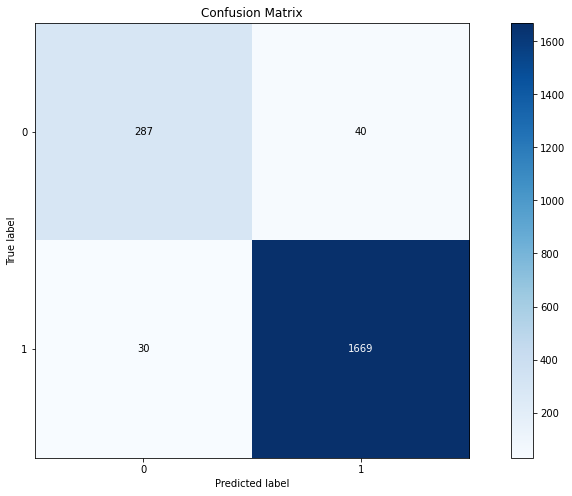

In [116]:
#Confusion matrix
cm=confusion_matrix(y_test, y_predict_xgb)
#Plot the confusion matrix
plot_confusion_matrix(y_test, y_predict_xgb, normalize=False,figsize=(15,8))

Out of 2026 samples, 70 samples are classified incorrectly.

In [117]:
#Classification report
class_report= classification_report(y_test, y_predict_xgb)
print(class_report)

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       327
           1       0.98      0.98      0.98      1699

    accuracy                           0.97      2026
   macro avg       0.94      0.93      0.94      2026
weighted avg       0.97      0.97      0.97      2026



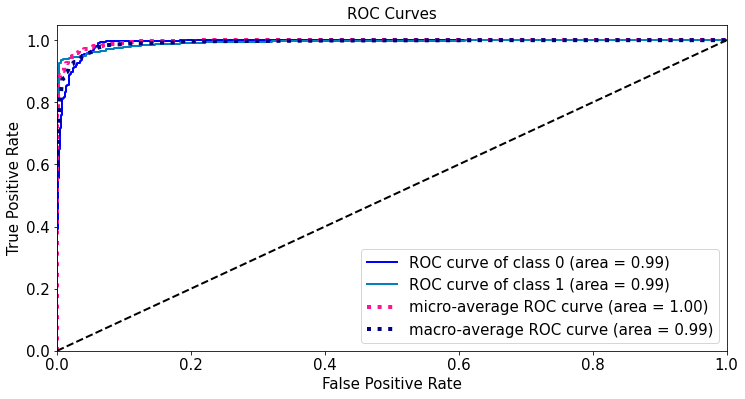

In [118]:
#ROC_AUC curve
# Plot ROC curve
skplt.metrics.plot_roc(y_test, y_pred_prob_xgb, figsize = (12,6), text_fontsize = 15, title_fontsize = 15,
                      cmap = 'winter')
plt.show()

Insights:

* XGB model performance is great with AUC score of 0.99.

We found **Random Forest**, **Gradient boosting**, & **XGboost** are 3 best models among all. We will use these models for hyperparameter tuning.

### Hyperparameter tuning using grid search

Random Forest

In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline 

#Define a Pipeline
pipe_rf = Pipeline([('rf', RandomForestClassifier())]) 

param_grid = {'rf__n_estimators': [50, 75, 100], 
              'rf__criterion': ['gini', 'entropy'], 
              'rf__class_weight':['balanced', {0:1, 1:5}],
              'rf__max_features':['auto', 'sqrt', 'log2']} 

grid = GridSearchCV( pipe_rf , param_grid = param_grid, cv = 3, scoring = 'roc_auc') 

grid.fit( X_train_best, y_train) 

print(" Best cross-validation accuracy: {:.2f}". format( grid.best_score_)) 
print(" Best parameters: ", grid.best_params_) 
print(" Test set accuracy: {:.2f}". format( grid.score( X_test_best, y_test)))

 Best cross-validation accuracy: 0.99
 Best parameters:  {'rf__class_weight': 'balanced', 'rf__criterion': 'entropy', 'rf__max_features': 'log2', 'rf__n_estimators': 100}
 Test set accuracy: 0.99


No changes in AUC score after GridSearchCV compared to rf model without hyperparameter tuning.

Gradient boosting classifier

In [120]:
#Define a Pipeline
pipe_gb = Pipeline([('gb', GradientBoostingClassifier())]) 

param_grid = {'gb__loss': ['deviance', 'exponential'], 
              'gb__learning_rate': [0.01, 0.02, 0.03, 0.05, 0.1], 
              'gb__n_estimators':[50, 75, 100],
              'gb__max_features':['auto', 'sqrt', 'log2']} 

grid = GridSearchCV( pipe_gb , param_grid = param_grid, cv = 3, scoring = 'roc_auc') 

grid.fit( X_train_best, y_train) 

print(" Best cross-validation accuracy: {:.2f}". format( grid.best_score_)) 
print(" Best parameters: ", grid.best_params_) 
print(" Test set accuracy: {:.2f}". format( grid.score( X_test_best, y_test)))

 Best cross-validation accuracy: 0.99
 Best parameters:  {'gb__learning_rate': 0.1, 'gb__loss': 'deviance', 'gb__max_features': 'auto', 'gb__n_estimators': 100}
 Test set accuracy: 0.99


No changes in AUC score after GridSearchCV compared to Gradient boosting model without hyperparameter tuning.

XGBoost model

In [121]:
#Define a Pipeline
pipe_xgb = Pipeline([('xgb', XGBClassifier(objective='binary:logistic', eval_metric = 'logloss'))]) 

param_grid = {'xgb__booster': ['gbtree', 'gblinear', 'dart'], 
              'xgb__learning_rate': [0.01, 0.02, 0.05, 0.1], 
              'xgb__n_estimators':[50, 75, 100],
              'xgb__reg_lambda':[0.01, 0.02, 0.05, 0.1]} 

grid = GridSearchCV( pipe_xgb , param_grid = param_grid, cv = 3, scoring = 'roc_auc') 

grid.fit( X_train_best, y_train) 

print(" Best cross-validation accuracy: {:.2f}". format( grid.best_score_)) 
print(" Best parameters: ", grid.best_params_) 
print(" Test set accuracy: {:.2f}". format( grid.score( X_test_best, y_test)))

 Best cross-validation accuracy: 0.99
 Best parameters:  {'xgb__booster': 'gbtree', 'xgb__learning_rate': 0.1, 'xgb__n_estimators': 100, 'xgb__reg_lambda': 0.01}
 Test set accuracy: 0.99


No changes in AUC score after GridSearchCV compared to XG boosting model without hyperparameter tuning.

### Hyperparameter tuning using RandomizedSearchCV

Random Forest

In [122]:
from sklearn.model_selection import RandomizedSearchCV

#Define a Pipeline
pipe_rf = Pipeline([('rf', RandomForestClassifier())]) 

param_grid = {'rf__n_estimators': [50, 75, 100], 
              'rf__criterion': ['gini', 'entropy'], 
              'rf__class_weight':['balanced', {0:1, 1:5}],
              'rf__max_features':['auto', 'sqrt', 'log2']} 

grid = RandomizedSearchCV( pipe_rf , param_distributions = param_grid, cv = 3, scoring = 'roc_auc') 

grid.fit( X_train_best, y_train) 

print(" Best cross-validation accuracy: {:.2f}". format( grid.best_score_)) 
print(" Best parameters: ", grid.best_params_) 
print(" Test set accuracy: {:.2f}". format( grid.score( X_test_best, y_test)))

 Best cross-validation accuracy: 0.99
 Best parameters:  {'rf__n_estimators': 50, 'rf__max_features': 'sqrt', 'rf__criterion': 'entropy', 'rf__class_weight': 'balanced'}
 Test set accuracy: 0.99


No changes in AUC score after RandomizedSearchCV compared to rf model without hyperparameter tuning.

Gradient boosting classifier

In [123]:
#Define a Pipeline
pipe_gb = Pipeline([('gb', GradientBoostingClassifier())]) 

param_grid = {'gb__loss': ['deviance', 'exponential'], 
              'gb__learning_rate': [0.01, 0.02, 0.03, 0.05, 0.1], 
              'gb__n_estimators':[50, 75, 100],
              'gb__max_features':['auto', 'sqrt', 'log2']} 

grid = RandomizedSearchCV( pipe_gb , param_distributions = param_grid, cv = 3, scoring = 'roc_auc') 

grid.fit( X_train_best, y_train) 

print(" Best cross-validation accuracy: {:.2f}". format( grid.best_score_)) 
print(" Best parameters: ", grid.best_params_) 
print(" Test set accuracy: {:.2f}". format( grid.score( X_test_best, y_test)))

 Best cross-validation accuracy: 0.99
 Best parameters:  {'gb__n_estimators': 100, 'gb__max_features': 'auto', 'gb__loss': 'deviance', 'gb__learning_rate': 0.1}
 Test set accuracy: 0.99


No changes in AUC score after RandomizedSearchCV compared to Gradient boosting model without hyperparameter tuning.

XGBoost model

In [124]:
#Define a Pipeline
pipe_xgb = Pipeline([('xgb', XGBClassifier(objective='binary:logistic', eval_metric = 'logloss'))]) 

param_grid = {'xgb__booster': ['gbtree', 'gblinear', 'dart'], 
              'xgb__learning_rate': [0.01, 0.02, 0.05, 0.1], 
              'xgb__n_estimators':[50, 75, 100],
              'xgb__reg_lambda':[0.01, 0.02, 0.05, 0.1]} 

grid = RandomizedSearchCV( pipe_xgb , param_distributions = param_grid, cv = 3, scoring = 'roc_auc') 

grid.fit( X_train_best, y_train) 

print(" Best cross-validation accuracy: {:.2f}". format( grid.best_score_)) 
print(" Best parameters: ", grid.best_params_) 
print(" Test set accuracy: {:.2f}". format( grid.score( X_test_best, y_test)))

 Best cross-validation accuracy: 0.99
 Best parameters:  {'xgb__reg_lambda': 0.02, 'xgb__n_estimators': 50, 'xgb__learning_rate': 0.1, 'xgb__booster': 'gbtree'}
 Test set accuracy: 0.99


No changes in AUC score after RandomizedSearchCV compared to XG boosting model without hyperparameter tuning.

**Model performance evaluation**

In [125]:
Results={
    'Model':['Logistic Regression','BaggingClassifier','Random Forest','Decision tree', 'Adaboost', 'XGBoost','Gradientboost'],
    'f1-score':[0.88, 0.96, 0.96, 0.93, 0.95, 0.97, 0.96],
    'AUC':[0.91, 0.98, 0.99, 0.88, 0.98, 0.99, 0.99],
    'f1_score - (downsampling)' :[0.89, 'NA','NA','NA','NA','NA','NA'],
    'AUC - (downsampling)' : [0.91, 'NA','NA','NA','NA','NA','NA'],
    'f1_score - (Upsampling)' : [0.87, 'NA','NA','NA','NA','NA','NA'],
    'AUC - (Upsampling)' : [0.91, 'NA','NA','NA','NA','NA','NA'],
    'AUC - (GridSearchCV)' : ['NA','NA', 0.99, 'NA','NA', 0.99, 0.99],
    'AUC - (RandomizedSearchCV)' : ['NA','NA', 0.99, 'NA','NA', 0.98, 0.99]
}

results_df=pd.DataFrame(Results)
# Sort_values by AUC
results_df = results_df.sort_values(by = ['AUC'], ascending=False).reset_index(drop = True)
results_df

,Model,f1-score,AUC,f1_score - (downsampling),AUC - (downsampling),f1_score - (Upsampling),AUC - (Upsampling),AUC - (GridSearchCV),AUC - (RandomizedSearchCV)
0,Random Forest,0.96,0.99,NA,NA,NA,NA,0.99,0.99
1,XGBoost,0.97,0.99,NA,NA,NA,NA,0.99,0.98
2,Gradientboost,0.96,0.99,NA,NA,NA,NA,0.99,0.99
3,BaggingClassifier,0.96,0.98,NA,NA,NA,NA,NA,NA
4,Adaboost,0.95,0.98,NA,NA,NA,NA,NA,NA
5,Logistic Regression,0.88,0.91,0.89,0.91,0.87,0.91,NA,NA
6,Decision tree,0.93,0.88,NA,NA,NA,NA,NA,NA


Insights:
* Best 3 models are Random Forest, XGBoost, & Gradient boost with an AUC score of 0.99.
* Decision tree is the worst classifier with an AUC score of 0.88 among all models.

**Actionable Insights & Recommendations**

* Since Graduates are more likely to churn, so introduce Graduates friendly credit cards. 
* Since blue card holders more likelt to churn, try to add some more benefits like increasing credit limit, give cash back offers etc.
* Also, married & single people are more likely to churn, introduce couple friendly cards.